In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
np.set_printoptions(linewidth=120)

In [56]:
tp=np.asarray([1,2,1,0,-1])
def samp(a,s):
    r=np.random.normal(np.zeros(10))
    for i in xrange(10):
        p=s*np.random.uniform()
        if p<a:
            r[i:i+5]+=tp[:min(5,10-i)]
    return r[5:]

def cov_m(a,s,n):
    events=np.asarray([samp(a,s) for i in xrange(n)])
    return np.cov(events.T)

def sig_est(a,s,n,off):
    m=cov_m(a,s,n)
    es=m[range(5-off),range(off,5)]
    return np.mean(es),np.std(es)
        

In [26]:
events=np.asarray([samp(.3,1) for i in xrange(10000)])

In [35]:
al=np.linspace(0,1,20)
rs=[sig_est(a,1,10000,0) for a in al]

In [61]:
rses=[[sig_est(a,1,10000,n) for a in al] for n in xrange(1,5)]

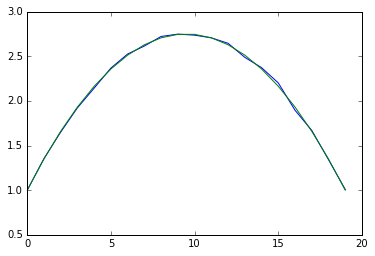

In [44]:
plt.plot(zip(*rs)[0])
fl=lambda x:(1+7*x-7*x**2)
plt.plot(fl(al))

In [80]:
for i in xrange(5):
    print np.correlate(tp[:5-i],tp[i:])
print np.correlate(tp,tp,'full')

[7]
[4]
[0]
[-2]
[-1]
[-1 -2  0  4  7  4  0 -2 -1]


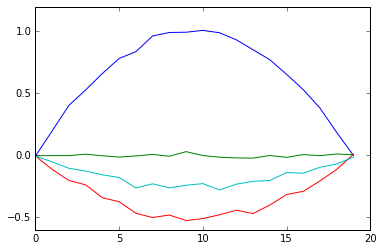

In [64]:
for i in xrange(4):
    plt.plot(zip(*rses[i])[0])

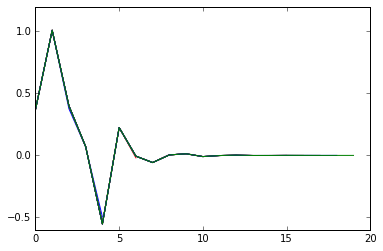

In [108]:
def cmat(a,s,l,cv):
    vl=len(cv)
    wmat=np.zeros((vl,vl))
    wmat[0,:]=cv
    wmat[:,0]=cv
    wmat=(a-a**2)*wmat
    wmat[0,0]+=s**2
    rmat=np.zeros((l,l))
    for n in xrange(l):
        rmat[n:n+vl,n:n+vl]+=wmat[:min(vl,l-n),:min(vl,l-n)]
    return rmat
    
cv=np.correlate(tp,tp,'full')[4:]

for l in xrange(5,21):
    plt.plot( np.dot( np.linalg.inv( cmat(.1,1,l,cv) ),np.pad(tp,(0,l-5),"constant") ) )

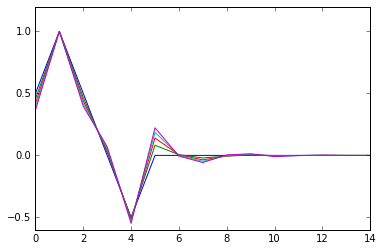

In [117]:
for a in np.linspace(0,.1,5):
    g=np.dot( np.linalg.inv( cmat(a,1,15,cv) ),np.pad(tp,(0,10),"constant") ) 
    plt.plot(g/np.max(g) )